In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
import pandas as pd


In [43]:
link = ("/content/244400644_stationnements_cyclables.csv")
df = pd.read_csv(link,sep=';')
df.head()

,geo_point_2d,Geo Shape,id_local,id_osm,code_com,coordonneesxy,capacite,capacite_cargo,type_accroche,mobilier,...,couverture,surveillance,lumiere,url_info,d_service,source,proprietaire,gestionnaire,date_maj,commentaires
0,"47.24014209999996, -2.2782823","{""coordinates"": [-2.2782823, 47.24014209999996...",40,n1655161104,44184,"[-2.2782823000000034,47.24014210000001]",4,NaN,ROUE,ARCEAU,...,Faux,Faux,Faux,NaN,NaN,© les contributeurs d’OpenStreetMap ; © CARENE,NaN,NaN,2022-09-19,NaN
1,"47.275722860270285, -2.205563401614654","{""coordinates"": [-2.205563401614654, 47.275722...",82,n1655161426,44184,"[-2.2055634016146564,47.27572286027034]",6,NaN,CADRE ET ROUE,ARCEAU,...,Faux,Faux,Faux,NaN,NaN,© les contributeurs d’OpenStreetMap ; © CARENE,NaN,NaN,2022-09-19,NaN
2,"47.285041587733524, -2.225726700976113","{""coordinates"": [-2.225726700976113, 47.285041...",540,NaN,44184,"[-2.225726700976119,47.28504158773357]",2,NaN,CADRE,ARCEAU,...,Faux,Faux,Faux,NaN,NaN,© CARENE,NaN,NaN,2022-09-19,NaN
3,"47.297832194912985, -2.193971151595806","{""coordinates"": [-2.193971151595806, 47.297832...",544,NaN,44184,"[-2.193971151595806,47.29783219491302]",3,NaN,ROUE,ARCEAU,...,Faux,Faux,Faux,NaN,NaN,© CARENE,NaN,NaN,2022-09-19,"stationnement amovible, mis à dispo par la lav..."
4,"47.28585974973144, -2.195954751533444","{""coordinates"": [-2.195954751533444, 47.285859...",545,NaN,44184,"[-2.195954751533448,47.28585974973149]",30,NaN,ROUE,RATELIER,...,Vrai,Faux,Faux,NaN,NaN,© CARENE,NaN,NaN,2022-09-19,salariés des chantiers navals


In [44]:
df.shape

(601, 23)

In [45]:
df.isnull().sum()

,0
geo_point_2d,0
Geo Shape,0
id_local,0
id_osm,162
code_com,0
coordonneesxy,0
capacite,0
capacite_cargo,600
type_accroche,0
mobilier,0


In [46]:
df.commentaires

,commentaires
0,NaN
1,NaN
2,NaN
3,"stationnement amovible, mis à dispo par la lav..."
4,salariés des chantiers navals
...,...
596,NaN
597,NaN
598,NaN
599,NaN


In [9]:
df.columns

Index(['geo_point_2d', 'Geo Shape', 'id_local', 'id_osm', 'code_com',
       'coordonneesxy', 'capacite', 'capacite_cargo', 'type_accroche',
       'mobilier', 'acces', 'gratuit', 'protection', 'couverture',
       'surveillance', 'lumiere', 'url_info', 'd_service', 'source',
       'proprietaire', 'gestionnaire', 'date_maj', 'commentaires'],
      dtype='object')

### Descriptive Analysis

In [10]:
df.describe()

,id_local,code_com,capacite,capacite_cargo,d_service
count,601.000000,601.000000,601.000000,1.0,11.000000
mean,340.860233,44164.159734,7.628952,2.0,2022.818182
std,194.827275,38.711296,5.392627,NaN,1.078720
min,1.000000,44013.000000,0.000000,2.0,2021.000000
25%,173.000000,44132.000000,4.000000,2.0,2022.000000
50%,341.000000,44184.000000,6.000000,2.0,2023.000000
75%,508.000000,44184.000000,10.000000,2.0,2024.000000
max,675.000000,44210.000000,48.000000,2.0,2024.000000


interpretation of descriptive

1. id_local (Local ID)
Count: 601 — This indicates that there are 601 unique parking locations in the dataset.
Mean: 340.86 — On average, the IDs of the parking locations are around 340, but since this is just an identifier, it doesn't carry significant meaning.
Standard Deviation (std): 194.83 — This shows how spread out the IDs are from the mean. The higher the value, the more spread the data points are from the average.
Min: 1 — The smallest ID is 1.
25% (1st Quartile): 173 — 25% of the parking locations have IDs less than 173.
50% (Median/2nd Quartile): 341 — Half of the parking locations have an ID less than or equal to 341.
75% (3rd Quartile): 508 — 75% of the parking locations have IDs less than 508.
Max: 675 — The largest ID is 675.
2. code_com (Municipality Code)
Count: 601 — There are 601 municipality codes, corresponding to 601 parking locations.
Mean: 44164.16 — The average code is 44164, but like id_local, it’s an identifier for municipalities.
Standard Deviation (std): 38.71 — This tells us how much variation there is in the municipality codes, but the number doesn’t have much interpretive value beyond showing some spread in the codes.
Min: 44013 — The smallest municipality code is 44013.
25% (1st Quartile): 44132 — 25% of the parking locations have codes less than 44132.
50% (Median/2nd Quartile): 44184 — Half of the locations have codes less than or equal to 44184.
75% (3rd Quartile): 44184 — 75% of the locations have codes less than 44184.
Max: 44210 — The largest municipality code is 44210.
3. capacite (Capacity of Parking)
Count: 601 — All 601 parking locations have data on capacity.
Mean: 7.63 — On average, each parking location can hold around 7.6 bicycles.
Standard Deviation (std): 5.39 — The capacity varies by about 5.39 bicycles from the mean across parking locations.
Min: 0 — There are locations with 0 capacity, meaning no bicycles can be parked there.
25% (1st Quartile): 4 — 25% of the locations can hold 4 or fewer bicycles.
50% (Median/2nd Quartile): 6 — Half of the parking locations can hold 6 or fewer bicycles.
75% (3rd Quartile): 10 — 75% of the parking locations can hold 10 or fewer bicycles.
Max: 48 — The largest parking capacity is 48 bicycles, indicating this is a large facility.
4. capacite_cargo (Capacity for Cargo Bikes)
Count: 1 — Only 1 parking location in the dataset has a value for capacite_cargo, meaning almost all locations do not have capacity specifically for cargo bikes.
Mean: 2 — The one location that has capacity for cargo bikes can hold 2 cargo bikes.
Standard Deviation (std): NaN — There is no standard deviation because only 1 data point exists.
Min, 25%, 50%, 75%, Max: 2 — Since there is only one data point, all these values are the same, showing the location has a capacity of 2 cargo bikes.
5. d_service (Year of Service)
Count: 11 — Only 11 entries have the year of service data.
Mean: 2022.82 — On average, the year of service is around 2022.
Standard Deviation (std): 1.08 — There is some spread in the years of service, varying by around 1 year from the mean.
Min: 2021 — The earliest year of service recorded is 2021.
25% (1st Quartile): 2022 — 25% of the locations have a year of service of 2022 or earlier.
50% (Median/2nd Quartile): 2023 — Half of the parking locations with service data were serviced in or before 2023.
75% (3rd Quartile): 2024 — 75% of the parking locations with service data were serviced by 2024.
Max: 2024 — The most recent year of service is 2024.
Overall Insights:
Capacity: The majority of parking locations have a capacity of 4-10 bikes, with an average of 7.6 bikes per location.
Cargo Capacity: Cargo bike capacity is rare, with only 1 location having capacity for cargo bikes.
Service Year: The majority of parking locations with available data have been updated or serviced in recent years (2022-2024).

In [11]:
# Frequency distribution of a categorical column
df['type_accroche'].value_counts()
df['mobilier'].value_counts()


,count
mobilier,
ARCEAU,585
RATELIER,16


Interpretation:

ARCEAU: There are 585 bicycle parking locations equipped with an "ARCEAU," which is a hoop or loop-type rack where bicycles can be secured.
RATELIER: There are 16 bicycle parking locations equipped with a "RATELIER," which is a bike rack typically used to hold multiple bikes by their wheels.
Insights:
The overwhelming majority (97.3%) of the parking facilities use ARCEAU as the main type of furniture, indicating that this type of rack is the preferred or most commonly installed infrastructure for bicycle parking.
Only 16 locations (2.7%) use the RATELIER type, which is much less common.
This suggests that the infrastructure is predominantly designed around the ARCEAU-type racks,

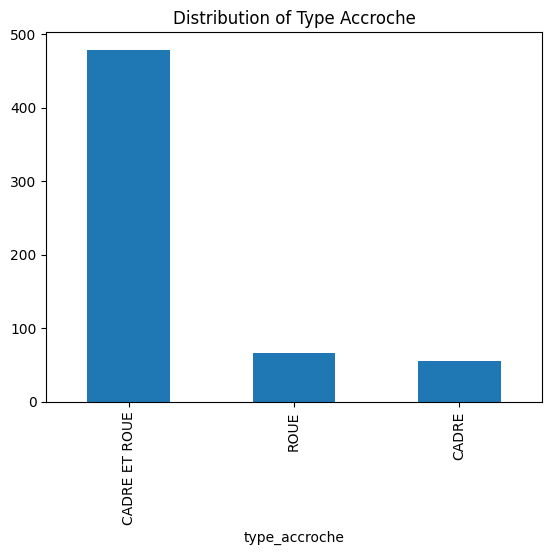

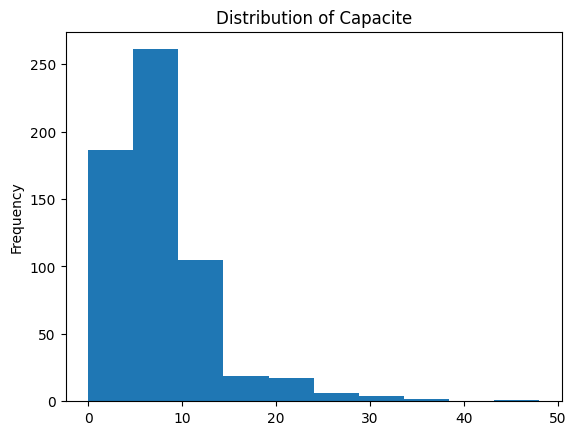

In [15]:

# Bar plot for categorical variables
df['type_accroche'].value_counts().plot(kind='bar', title='Distribution of Type Accroche')
plt.show()

# Histogram for numerical variables like capacity
df['capacite'].plot(kind='hist', bins=10, title='Distribution of Capacite')
plt.show()


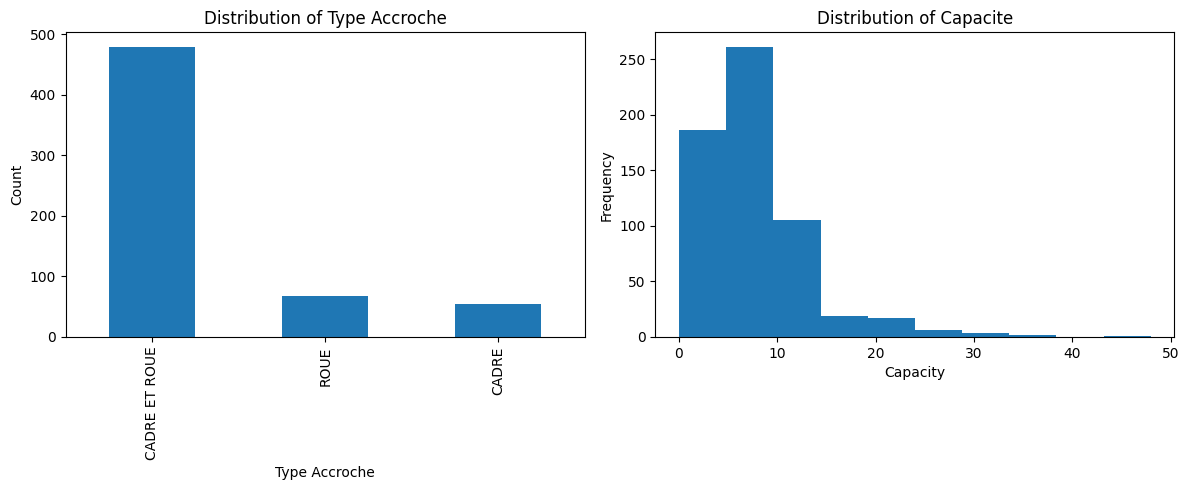

In [13]:
import matplotlib.pyplot as plt

# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Bar plot for 'type_accroche'
df['type_accroche'].value_counts().plot(kind='bar', ax=axes[0], title='Distribution of Type Accroche')
axes[0].set_title('Distribution of Type Accroche')  # Set the title for the first subplot
axes[0].set_xlabel('Type Accroche')  # Label x-axis
axes[0].set_ylabel('Count')  # Label y-axis

# Histogram for 'capacite'
df['capacite'].plot(kind='hist', bins=10, ax=axes[1], title='Distribution of Capacite')
axes[1].set_title('Distribution of Capacite')  # Set the title for the second subplot
axes[1].set_xlabel('Capacity')  # Label x-axis
axes[1].set_ylabel('Frequency')  # Label y-axis

# Adjust layout
plt.tight_layout()  # Automatically adjust spacing between plots

# Display the plots
plt.show()


### Handling Missing Data

In [16]:
# Fill missing values with the median for numerical columns
df['capacite'].fillna(df['capacite'].median(), inplace=True)

# Fill missing categorical data with the most frequent value
df['type_accroche'].fillna(df['type_accroche'].mode()[0], inplace=True)


<ipython-input-16-2ce0b47b09b0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type_accroche'].fillna(df['type_accroche'].mode()[0], inplace=True)


In [17]:
# Drop rows with missing values
df.dropna(inplace=True)


###Detecting Outliers

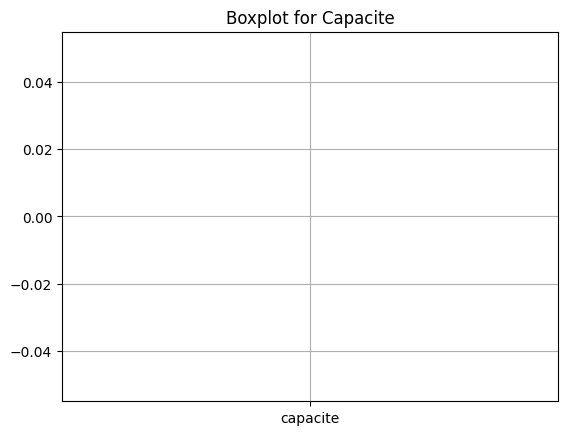

In [18]:
# Boxplot to detect outliers in capacity
df.boxplot(column='capacite')
plt.title('Boxplot for Capacite')
plt.show()


In [19]:
# Check the unique values in the 'capacite' column
df['capacite'].unique()


array([], dtype=int64)

The output array([], dtype=int64) suggests that the capacite column contains no unique values, which likely means one of the following:

The capacite column is completely empty (all values might be NaN or missing).
The capacite column contains no valid integers (possibly it was misread as a different data type or has non-numeric data).

In [20]:
# Check for missing values in 'capacite'
df['capacite'].isnull().sum()


0

In [21]:
# Check the data type of 'capacite'
print(df['capacite'].dtype)


int64


In [22]:
# Check for any non-numeric values
non_numeric_values = df[~df['capacite'].apply(lambda x: str(x).isdigit())]
print(non_numeric_values)


Empty DataFrame
Columns: []
Index: []


In [23]:
# Calculate IQR and detect outliers
Q1 = df['capacite'].quantile(0.25)
Q3 = df['capacite'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['capacite'] < (Q1 - 1.5 * IQR)) | (df['capacite'] > (Q3 + 1.5 * IQR))]
print("Outliers in Capacite:", outliers)


Outliers in Capacite: Empty DataFrame
Columns: [geo_point_2d, Geo Shape, id_local, id_osm, code_com, coordonneesxy, capacite, capacite_cargo, type_accroche, mobilier, acces, gratuit, protection, couverture, surveillance, lumiere, url_info, d_service, source, proprietaire, gestionnaire, date_maj, commentaires]
Index: []

[0 rows x 23 columns]


In [27]:
skewness = df['capacite'].skew()
kurtosis = df['capacite'].kurtosis()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')


Skewness: nan, Kurtosis: nan


###2. Geospatial Analysis

In [28]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point
import matplotlib.pyplot as plt


Understand the Geographical Data
geo_point_2d: Likely contains the latitude and longitude in a comma-separated format.
Geo Shape: Likely contains more detailed geographic information (such as polygons for areas).
coordonneesxy: Could also contain XY coordinates in some format.

In [29]:
df.geo_point_2d

,geo_point_2d


In [32]:
# Filter out rows where 'geo_point_2d' doesn't contain a valid latitude and longitude pair
df = df[df['geo_point_2d'].str.contains(',')]
df

,geo_point_2d,Geo Shape,id_local,id_osm,code_com,coordonneesxy,capacite,capacite_cargo,type_accroche,mobilier,...,couverture,surveillance,lumiere,url_info,d_service,source,proprietaire,gestionnaire,date_maj,commentaires


In [35]:
# Check for rows with missing or malformed data in 'geo_point_2d'
df['geo_point_2d'].apply(lambda x: len(x.split(',')) != 2).sum()


0

In [37]:
df.geo_point_2d

,geo_point_2d


In [42]:
link = ("/content/244400644_stationnements_cyclables.csv")
df2 = pd.read_csv(link,sep=';')
df.head()

,geo_point_2d,Geo Shape,id_local,id_osm,code_com,coordonneesxy,capacite,capacite_cargo,type_accroche,mobilier,...,couverture,surveillance,lumiere,url_info,d_service,source,proprietaire,gestionnaire,date_maj,commentaires
